In [2]:
import pandas as EPandas
Early_Diabet = 'EarlyPredictions_Diabetic.csv'

Early_Prediction = EPandas.read_csv(Early_Diabet)
Early_Prediction

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.000000,0,1,4,25.190000,6.600000,140,0
1,54.000000,0,0,0,27.320000,6.600000,80,0
2,28.000000,0,0,4,27.320000,5.700000,158,0
3,36.000000,0,0,1,23.450000,5.000000,155,0
4,76.000000,1,1,1,20.140000,4.800000,155,0
...,...,...,...,...,...,...,...,...
170277,75.000000,0,0,3,25.658157,7.286903,280,1
170278,64.564929,0,0,4,39.150721,7.895450,240,1
170279,43.716761,0,0,0,45.907111,5.800000,157,1
170280,56.870281,0,0,4,30.369313,6.548112,145,1


In [3]:
from sklearn.preprocessing import PolynomialFeatures

X_diabet = Early_Prediction.drop('diabetes',axis=1)
y_EarlyDiabet = Early_Prediction['diabetes']

#$$$$ Initialize PolynomialFeatures
Diabet_poly = PolynomialFeatures(degree=2, include_bias=False)

#$$$$ Transform the features to include polynomial features
X_EarlyDiabet = Diabet_poly.fit_transform(X_diabet)

#$$$$$ Convert the transformed features into a DataFrame for easy viewing
Early_Prediction = EPandas.DataFrame(X_EarlyDiabet, columns=Diabet_poly.get_feature_names_out(X_diabet.columns))

print("Polynomial Features Shape: ",X_EarlyDiabet.shape)
Early_Prediction.head()

Polynomial Features Shape:  (170282, 35)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age^2,age hypertension,age heart_disease,...,smoking_history^2,smoking_history bmi,smoking_history HbA1c_level,smoking_history blood_glucose_level,bmi^2,bmi HbA1c_level,bmi blood_glucose_level,HbA1c_level^2,HbA1c_level blood_glucose_level,blood_glucose_level^2
0,80.0,0.0,1.0,4.0,25.19,6.6,140.0,6400.0,0.0,80.0,...,16.0,100.76,26.4,560.0,634.5361,166.254,3526.60,43.56,924.0,19600.0
1,54.0,0.0,0.0,0.0,27.32,6.6,80.0,2916.0,0.0,0.0,...,0.0,0.00,0.0,0.0,746.3824,180.312,2185.60,43.56,528.0,6400.0
2,28.0,0.0,0.0,4.0,27.32,5.7,158.0,784.0,0.0,0.0,...,16.0,109.28,22.8,632.0,746.3824,155.724,4316.56,32.49,900.6,24964.0
3,36.0,0.0,0.0,1.0,23.45,5.0,155.0,1296.0,0.0,0.0,...,1.0,23.45,5.0,155.0,549.9025,117.250,3634.75,25.00,775.0,24025.0
4,76.0,1.0,1.0,1.0,20.14,4.8,155.0,5776.0,76.0,76.0,...,1.0,20.14,4.8,155.0,405.6196,96.672,3121.70,23.04,744.0,24025.0


In [4]:
Early_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170282 entries, 0 to 170281
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  170282 non-null  float64
 1   hypertension                         170282 non-null  float64
 2   heart_disease                        170282 non-null  float64
 3   smoking_history                      170282 non-null  float64
 4   bmi                                  170282 non-null  float64
 5   HbA1c_level                          170282 non-null  float64
 6   blood_glucose_level                  170282 non-null  float64
 7   age^2                                170282 non-null  float64
 8   age hypertension                     170282 non-null  float64
 9   age heart_disease                    170282 non-null  float64
 10  age smoking_history                  170282 non-null  float64
 11  age bmi      

In [5]:
from sklearn.model_selection import train_test_split as E_AttTSpl
Xt_EarlyDiabet, Xs_EarlyDiabet, yt_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(X_EarlyDiabet,y_EarlyDiabet,test_size=0.4,random_state= 11)
Xv_EarlyDiabet, Xs_EarlyDiabet, yv_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(Xs_EarlyDiabet,ys_EarlyDiabet,test_size=0.5,random_state= 11)

In [6]:
print("\nEarly Diabetics Training : ",Xt_EarlyDiabet.shape)
Xt_EarlyDiabet


Early Diabetics Training :  (102169, 35)


array([[4.82523652e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.82836928e+01, 8.66233444e+02, 1.96000000e+04],
       [6.99639533e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.58486432e+01, 8.53166490e+02, 1.58760000e+04],
       [4.50000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        3.72100000e+01, 9.45500000e+02, 2.40250000e+04],
       ...,
       [7.00000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 5.61000000e+02, 7.22500000e+03],
       [3.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 5.61000000e+02, 7.22500000e+03],
       [5.13751907e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.29847892e+01, 1.96688358e+03, 9.00000000e+04]])

In [7]:
print("Early Diabetics Testing : ",Xs_EarlyDiabet.shape)
Xs_EarlyDiabet

Early Diabetics Testing :  (34057, 35)


array([[4.20000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e+01, 6.50000000e+02, 1.69000000e+04],
       [8.00000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        3.72100000e+01, 9.63800000e+02, 2.49640000e+04],
       [8.00000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        5.62500000e+01, 1.19250000e+03, 2.52810000e+04],
       ...,
       [7.20932765e+01, 1.00000000e+00, 0.00000000e+00, ...,
        3.81513867e+01, 1.72947065e+03, 7.84000000e+04],
       [5.00000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        4.22500000e+01, 9.10000000e+02, 1.96000000e+04],
       [4.10000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 1.04280000e+03, 2.49640000e+04]])

In [8]:
print("Early Diabetics Validation : ",Xv_EarlyDiabet.shape)
Xv_EarlyDiabet

Early Diabetics Validation :  (34056, 35)


array([[4.7000e+01, 0.0000e+00, 0.0000e+00, ..., 3.7210e+01, 6.1000e+02,
        1.0000e+04],
       [1.5600e+00, 0.0000e+00, 0.0000e+00, ..., 3.6000e+01, 9.5400e+02,
        2.5281e+04],
       [6.7000e+01, 0.0000e+00, 1.0000e+00, ..., 1.2250e+01, 5.0750e+02,
        2.1025e+04],
       ...,
       [8.0000e+01, 0.0000e+00, 0.0000e+00, ..., 1.2250e+01, 5.6000e+02,
        2.5600e+04],
       [1.2000e+01, 0.0000e+00, 0.0000e+00, ..., 3.8440e+01, 9.6100e+02,
        2.4025e+04],
       [7.9000e+01, 1.0000e+00, 1.0000e+00, ..., 4.9000e+01, 1.8200e+03,
        6.7600e+04]])

In [9]:
from sklearn.model_selection import GridSearchCV as EarlyGrid
import warnings as wr_EarlyDiabet
wr_EarlyDiabet.filterwarnings("ignore")
from sklearn import metrics as EarlyMet
from sklearn.metrics import confusion_matrix as EarlyMatx
from sklearn.metrics import ConfusionMatrixDisplay as EarlyMatxdis
from sklearn.metrics import classification_report as EarlyCre
import matplotlib.pyplot as EarlyPlot
from sklearn.ensemble import GradientBoostingClassifier as EarlyGBCL
from sklearn.naive_bayes import GaussianNB as EarlyGNB
from sklearn.naive_bayes import BernoulliNB as EarlyBNB
from sklearn.ensemble import RandomForestClassifier as EarlyRFC
from sklearn.ensemble import ExtraTreesClassifier as EarlyETC
from sklearn.ensemble import AdaBoostClassifier as EarlyABC

## **Naive Bayes Variants**

### **Gaussian NB**

In [ ]:
Early_DiabetP = { 'priors':[None, 1.0, 2.0],'var_smoothing': [1e-09, 1e-03, 1e-06]}
Mdl_EarlyDiabet = EarlyGNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'priors': None, 'var_smoothing': 1e-06}


GaussianNB(var_smoothing=1e-06)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     16975
           1       0.87      0.78      0.82     17081

    accuracy                           0.83     34056
   macro avg       0.83      0.83      0.83     34056
weighted avg       0.83      0.83      0.83     34056



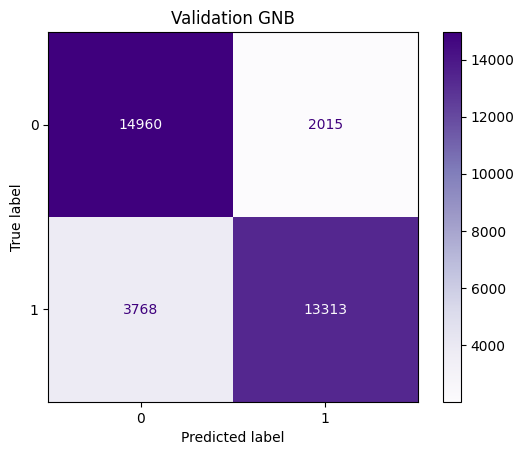

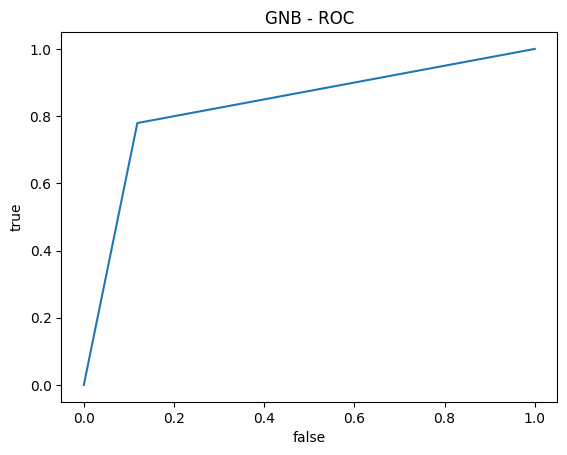


GNB - AUC: 0.8303500198611846


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     16983
           1       0.87      0.78      0.82     17074

    accuracy                           0.83     34057
   macro avg       0.84      0.83      0.83     34057
weighted avg       0.84      0.83      0.83     34057



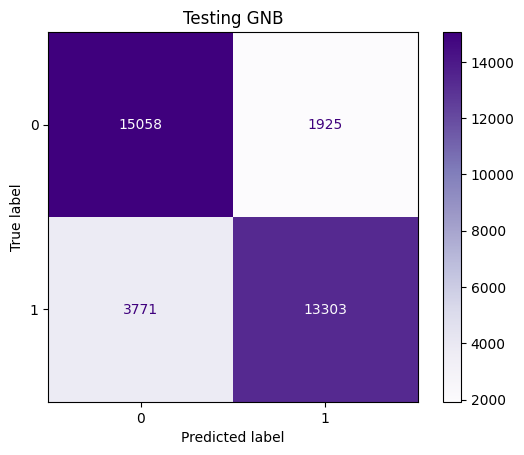

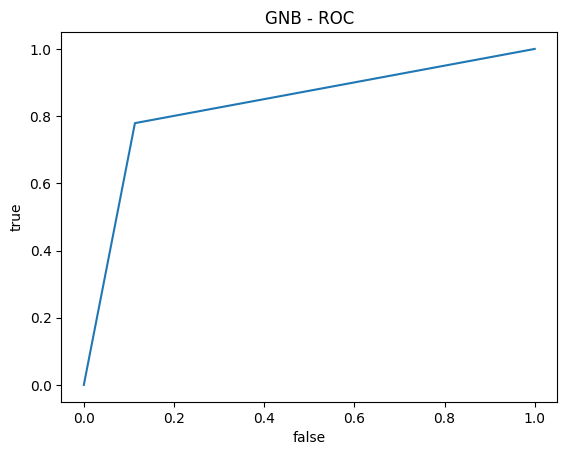


GNB - AUC: 0.8328946138429425


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

### **Bernoulli NB**

In [ ]:
Early_DiabetP = { 'alpha':[1.0, 0.01, 0.08],'force_alpha': [True, False]}
Mdl_EarlyDiabet = EarlyBNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyBNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'alpha': 1.0, 'force_alpha': True}


BernoulliNB()

              precision    recall  f1-score   support

           0       0.64      0.34      0.45     16975
           1       0.55      0.81      0.66     17081

    accuracy                           0.58     34056
   macro avg       0.60      0.58      0.55     34056
weighted avg       0.60      0.58      0.55     34056



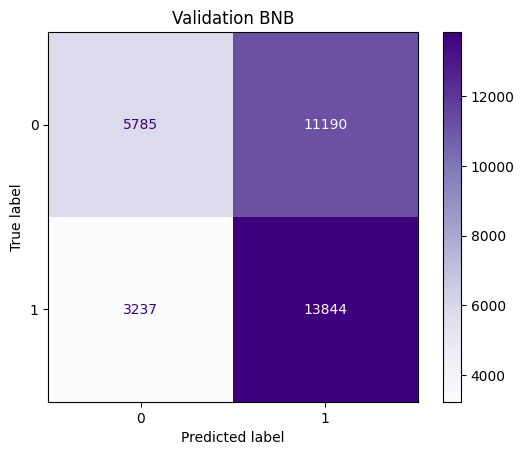

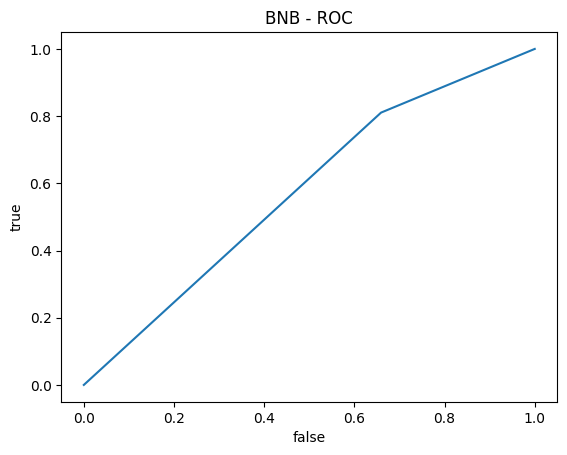


BNB - AUC: 0.5756432381137471


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45     16983
           1       0.55      0.81      0.66     17074

    accuracy                           0.58     34057
   macro avg       0.60      0.58      0.55     34057
weighted avg       0.60      0.58      0.55     34057



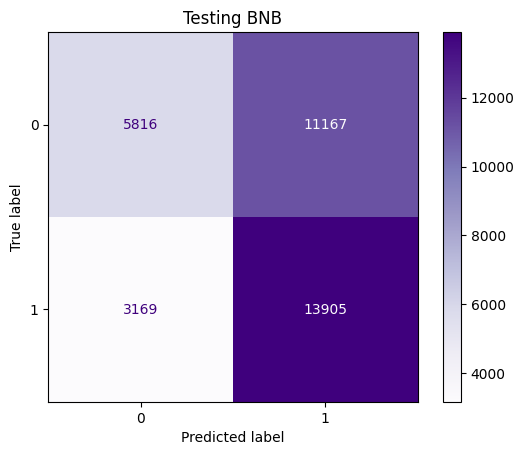

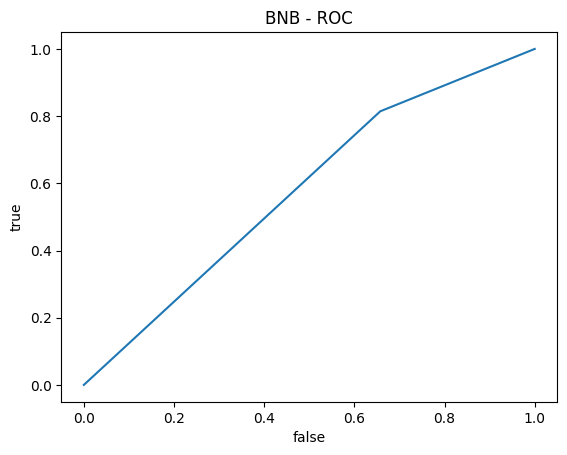


BNB - AUC: 0.5784281325334457


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

## **Tree based Models**

### **Random Forest**

In [ ]:
Early_DiabetP = { 'max_depth':[1, 2, 3],'criterion': ['gini','entropy','log_loss'],'bootstrap':[True,False]}
Mdl_EarlyDiabet = EarlyRFC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyRFC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3}


RandomForestClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     16975
           1       0.88      0.93      0.90     17081

    accuracy                           0.90     34056
   macro avg       0.90      0.90      0.90     34056
weighted avg       0.90      0.90      0.90     34056



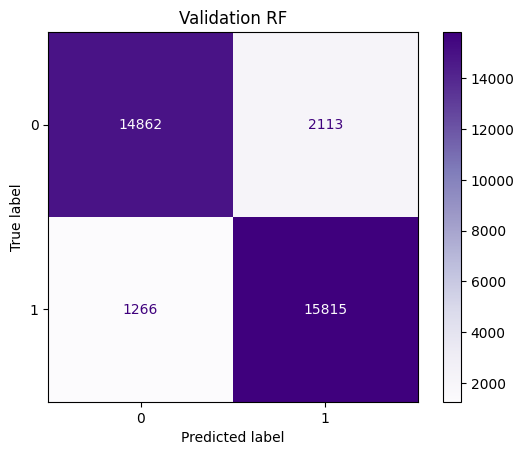

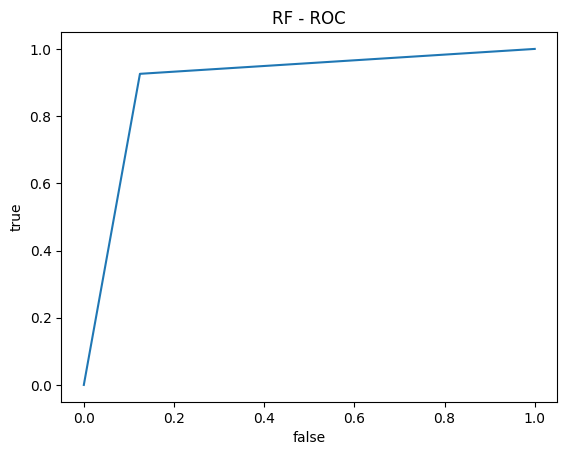


RF - AUC: 0.900702693628444


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('RF - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     16983
           1       0.88      0.92      0.90     17074

    accuracy                           0.90     34057
   macro avg       0.90      0.90      0.90     34057
weighted avg       0.90      0.90      0.90     34057



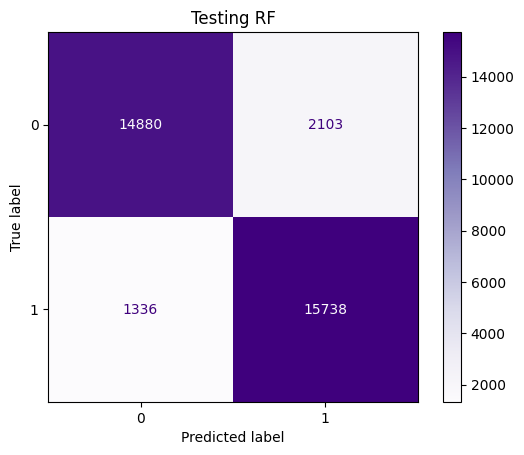

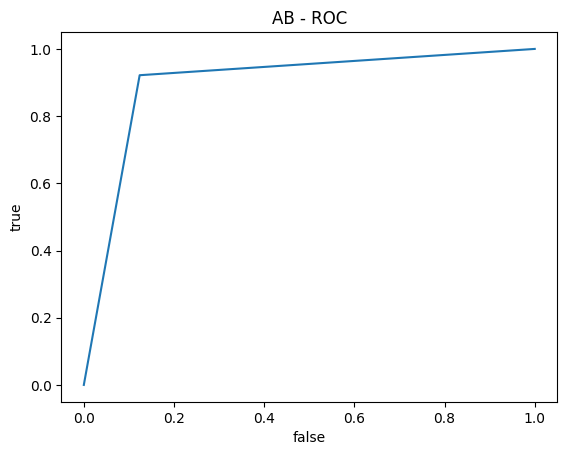


RF - AUC: 0.8989613299813192


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

### **Extra Trees**

In [ ]:
Early_DiabetP = {'criterion':['gini','log_loss', 'entropy'],'max_depth': [1, 2, 3]}
Mdl_EarlyDiabet = EarlyETC(random_state=7)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyETC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'criterion': 'gini', 'max_depth': 3}


ExtraTreesClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     16975
           1       0.87      0.89      0.88     17081

    accuracy                           0.88     34056
   macro avg       0.88      0.88      0.88     34056
weighted avg       0.88      0.88      0.88     34056



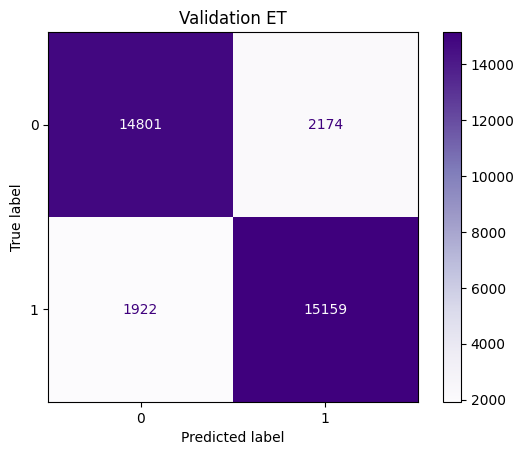

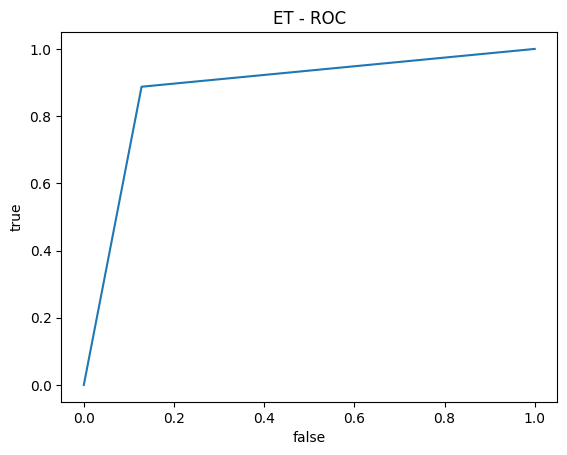


ET - AUC: 0.8797033108900941


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     16983
           1       0.88      0.88      0.88     17074

    accuracy                           0.88     34057
   macro avg       0.88      0.88      0.88     34057
weighted avg       0.88      0.88      0.88     34057



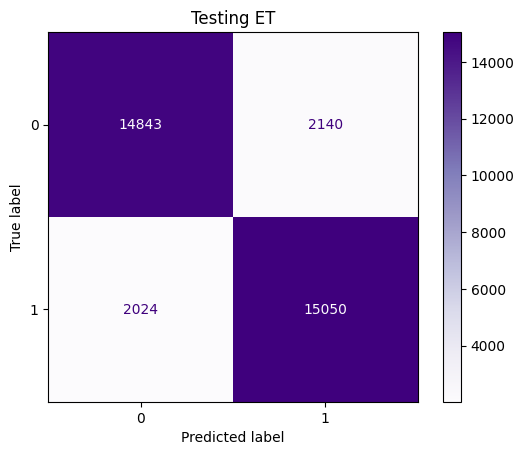

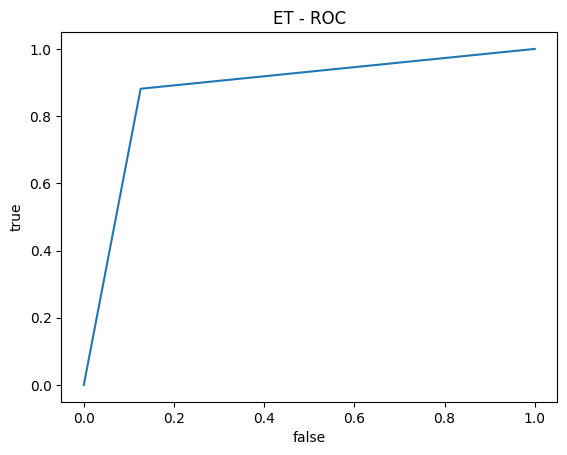


ET - AUC: 0.8777244125313773


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

## **Boosting Models**

### **Gradient Boost**

In [10]:
Early_DiabetP = { 'loss':['log_loss', 'exponential'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyGBCL(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGBCL(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 140}


GradientBoostingClassifier(learning_rate=1.0, loss='exponential',
                           n_estimators=140)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16975
           1       0.98      0.96      0.97     17081

    accuracy                           0.97     34056
   macro avg       0.97      0.97      0.97     34056
weighted avg       0.97      0.97      0.97     34056



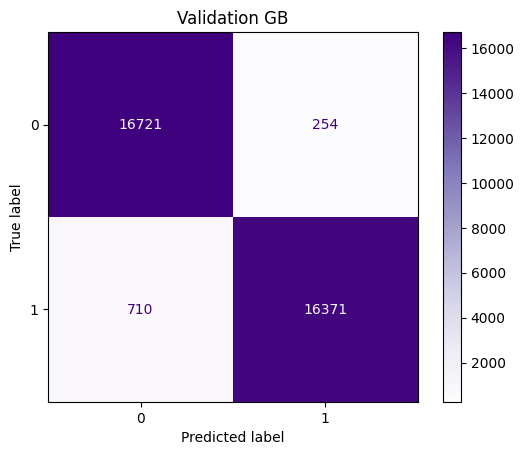

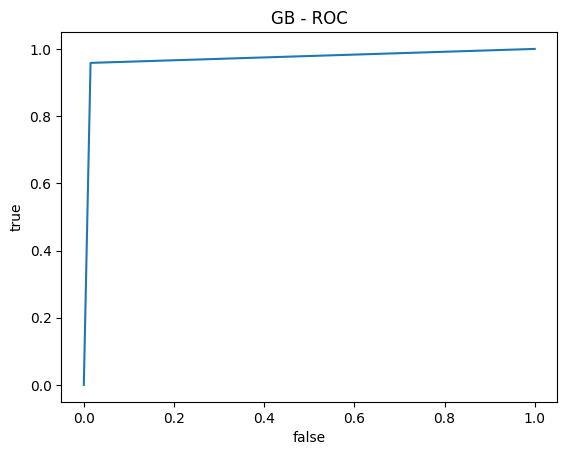


GB - AUC: 0.9717350829224939


In [11]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation GB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nGB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16983
           1       0.99      0.96      0.97     17074

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057



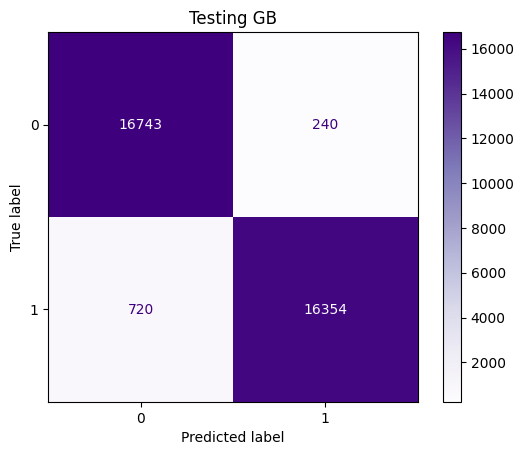

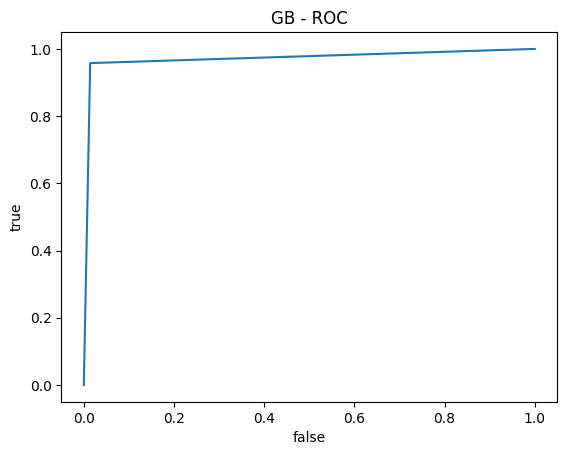


GB - AUC: 0.9718494204089778


In [12]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGB - AUC:", A_Diabet)

### **AdaBoost**

In [ ]:
Early_DiabetP = { 'algorithm':['SAMME', 'SAMME.R'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyABC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyABC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 170}


AdaBoostClassifier(algorithm='SAMME', n_estimators=170)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     16975
           1       0.93      0.94      0.94     17081

    accuracy                           0.93     34056
   macro avg       0.93      0.93      0.93     34056
weighted avg       0.93      0.93      0.93     34056



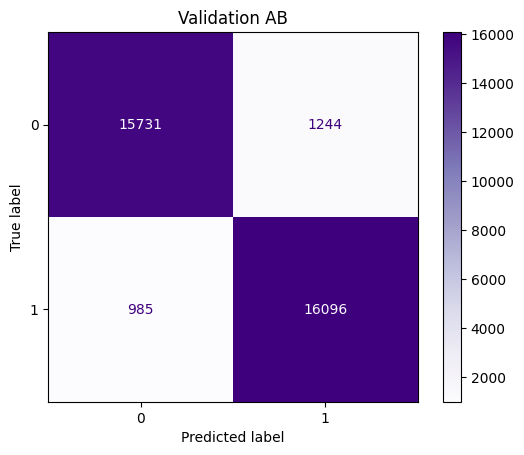

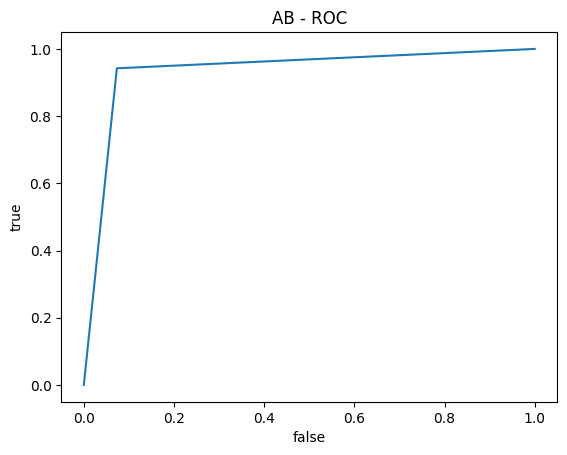


AB - AUC: 0.9345246727474282


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     16983
           1       0.93      0.94      0.93     17074

    accuracy                           0.93     34057
   macro avg       0.93      0.93      0.93     34057
weighted avg       0.93      0.93      0.93     34057



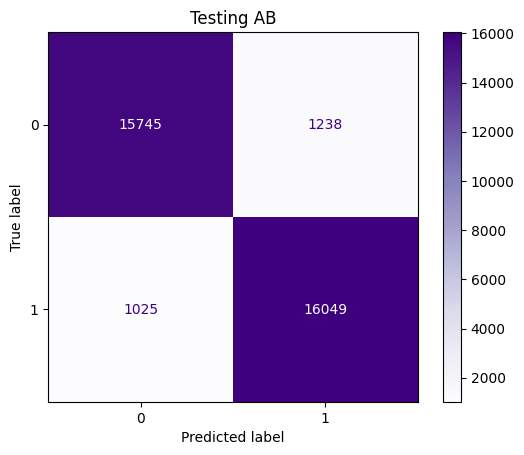

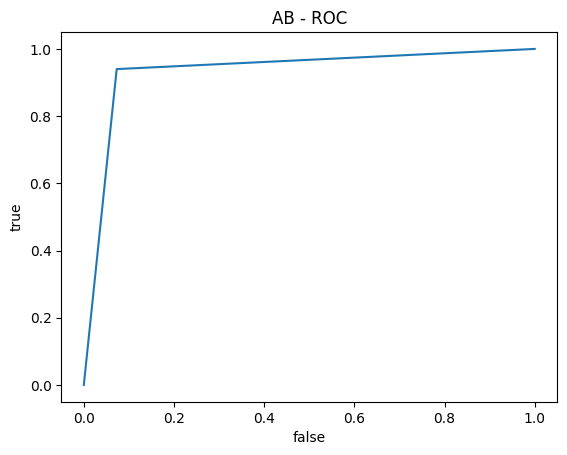


AB - AUC: 0.9335353878777316


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)